In [2]:
import pymongo
import pandas as pd
import base64
from PIL import Image
import io
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [3]:
timelines = pd.read_csv('../recommendation/timelines.csv')

In [4]:
timelines.head()

,UserId,Age,Gender,Demography,Emotions,StartTime,EndTime
0,Lahiru_23_male,23.0,Male,Done,Done,6.00,662.0
1,Lalith_57_m,57.0,Male,NaN,NaN,NaN,NaN
2,Kavindu__19_m,19.0,Male,Done,Done,7.50,665.0
3,Anusha_56_f,56.0,Female,Done,Done,8.57,667.0
4,Irangani_73_f,73.0,Female,Done,Done,8.57,667.0


In [5]:
demographies = pd.read_csv('../recommendation/demographies.csv')
demographies.head()

,userId,images
0,test,"[{""time"":1.622962474941e+12,""data"":""data:image..."
1,test1,"[{""time"":1.622962474941e+12,""data"":""data:image..."
2,test12,"[{""time"":1.62296472568e+12,""data"":""data:image/..."
3,chandula_24_female,"[{""time"":1.622967559318e+12,""data"":""data:image..."
4,test123,"[{""time"":1.622967734756e+12,""data"":""data:image..."


In [4]:
timelines = timelines.dropna()

In [6]:
emo = pd.read_csv('../recommendation/emotions.csv')
emo = emo.sort_values(by=['userId', 'timestamp'])
emo = emo.dropna()

In [7]:
emo.head()

,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,...,disgust,contempt,anger,fear,surprise,valence,engagement,timestamp,userId,_id
219105,0.000023,0.286420,0.324985,0.000130,0.043827,0.000022,0.000339,0.388137,0.003109,0.002685,...,0.427603,0.192674,0.001948,0.004508,0.197079,0.0,0.083111,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775760)
219107,0.001308,0.005566,0.290480,0.000741,0.265971,0.027669,0.000128,0.035873,0.001603,0.001879,...,0.479791,0.192659,0.001952,0.004343,0.200429,0.0,0.117863,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775761)
219106,0.000184,0.011433,0.138774,0.001032,0.209178,0.041469,0.002174,0.028054,0.001491,0.001221,...,0.443336,0.192675,0.001963,0.004485,0.195367,0.0,0.085559,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775762)
219108,0.000069,0.004591,0.061073,0.009487,21.571196,0.042780,0.003898,0.233027,0.009496,0.000315,...,2.915958,0.192707,0.001984,0.004514,0.193769,0.0,0.373818,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775763)
219110,0.000199,0.006848,0.219500,0.030979,4.126130,0.044266,0.019357,6.855668,0.012115,0.000771,...,0.628714,0.192783,0.002459,0.004506,0.194787,0.0,0.172907,1.623047e+12,Akarsha_12_Female,ObjectId(60bdbd2d75bcd134fe775764)


In [8]:
max(emo['smile'])

100.0

In [7]:
emo.columns

Index(['smile', 'innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle',
       'upperLipRaise', 'lipCornerDepressor', 'chinRaise', 'lipPucker',
       'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure', 'attention',
       'lidTighten', 'jawDrop', 'dimpler', 'eyeWiden', 'cheekRaise',
       'lipStretch', 'joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear',
       'surprise', 'valence', 'engagement', 'timestamp', 'userId', '_id'],
      dtype='object')

In [8]:
movieParts = pd.read_csv('../recommendation/adsAndMovie_without_na.csv')

In [9]:
moviePartsWithAge = pd.read_csv('../recommendation/meanOfMovieWithAge.csv')

In [10]:
movieColumns=['1.0_M', '1.0_A', '2.0_M', '2.0_A', '3.0_M', '3.0_A', '4.0_M', '4.0_A', 'userId']

In [31]:
# moviePartsWithAge.loc[moviePartsWithAge['userId'] == 'Sanuli_12_female']

In [9]:
# finding the most liked and hated ad
moviePartsWithAge = pd.read_csv('../recommendation/meanOfMovieWithAge.csv')

In [10]:
moviePartsWithAge.loc[moviePartsWithAge['userId'] == 'Lahiru_23_male']

,Unnamed: 0,Unnamed: 0.1,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,...,anger,fear,surprise,valence,engagement,timestamp,userId,num,part,age
0,0,mean,0.944980,0.007321,12.931460,0.000247,0.001265,6.469341,2.508669,3.186199,...,0.037459,0.076230,4.207244,-5.051303,15.784402,36.196418,Lahiru_23_male,1.0,M,1
1,1,mean,0.000223,0.001590,12.212350,0.000247,0.003044,0.917955,4.922062,6.981729,...,0.390009,0.003132,4.062983,-7.817432,14.007696,82.014279,Lahiru_23_male,1.0,A,1
2,2,mean,0.585185,0.005256,12.794181,0.000236,0.001991,4.346483,3.189683,4.299268,...,0.152735,0.048412,4.056534,-5.722758,14.642886,49.798928,Lahiru_23_male,2.0,M,1
3,3,mean,0.250589,0.252834,10.394885,0.007487,0.077309,2.349885,9.574063,3.080715,...,0.088650,0.226062,3.796687,-7.349686,13.669061,115.964499,Lahiru_23_male,2.0,A,1
4,4,mean,0.224445,0.237248,11.080581,0.117665,0.073010,2.119239,12.559441,2.798391,...,0.094116,0.202612,4.322070,-9.253248,15.385725,129.701614,Lahiru_23_male,3.0,M,1
5,5,mean,2.009563,0.185200,11.330839,0.084009,0.055128,2.136273,14.387203,2.673038,...,0.076611,0.144169,3.665013,-8.220958,17.396636,184.123915,Lahiru_23_male,3.0,A,1
6,6,mean,6.595376,0.170446,10.475908,0.077316,0.051068,2.951739,13.332749,2.535868,...,0.071339,0.132743,3.669115,-2.989107,22.005073,200.334350,Lahiru_23_male,4.0,M,1
7,7,mean,5.527062,0.170824,9.908801,0.064805,0.043436,2.566737,16.759428,2.217050,...,0.062985,0.111668,3.218508,-5.853229,21.800915,240.565510,Lahiru_23_male,4.0,A,1


In [12]:
print(min(moviePartsWithAge['valence']))
print(min(moviePartsWithAge['valence']))
print(max(moviePartsWithAge['valence']))
print(max(moviePartsWithAge['valence']))


-47.26481256140283
-47.26481256140283
44.087994336349055
44.087994336349055


In [41]:
# creating favAd dataframe
moviePartsWithAge.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch', 'joy', 'sadness', 'disgust',
       'contempt', 'anger', 'fear', 'surprise', 'valence', 'engagement',
       'timestamp', 'userId', 'num', 'part', 'age'],
      dtype='object')

In [27]:
usernames = set(list(movieParts['userId']))

In [46]:
favAd = pd.DataFrame(list(usernames), columns=['userId'])
favAd['ad'] = 0

In [14]:
# for name in usernames:
#     rows = moviePartsWithAge.loc[moviePartsWithAge['userId'] == name]
#     print(rows[['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'userId']])
#     rows = moviePartsWithAge.loc[(moviePartsWithAge['userId'] == name) & (rows['part'] == 'A')]
# #     rows = rows.loc[rows['part'] == 'A']
# #     print(rows['attention'])
# #     print(rows['joy'])
# #     print(rows['engagement'])
#     print(rows[['joy', 'surprise', 'valence', 'engagement', 'attention', 'age']])
#     print(rows.loc[rows['attention'] == max(rows['attention'])][['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'num']])
#     rows = rows.loc[rows['attention'] == max(rows['attention'])][['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'num']]
#     print(rows['num'].values[0])
#     favAd.loc[favAd['userId'] == name, 'ad'] = rows['num'].values[0]
# #     break



In [45]:
favAd['ad_with_joy'] = 0
favAd['ad_with_sadness'] = 0
favAd['ad_with_disgust'] = 0
favAd['ad_with_contempt'] = 0
favAd['ad_with_anger'] = 0
favAd['ad_with_fear'] = 0
favAd['ad_with_surprice'] = 0
favAd['ad_with_engagement'] = 0
favAd['ad_with_attention'] = 0


In [15]:
for emoName in ['attention', 'joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear', 'surprise', 'engagement']:
    for name in usernames:
        rows = moviePartsWithAge.loc[moviePartsWithAge['userId'] == name]
        print(rows[['joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear', 'surprise', 'valence', 'engagement', 'attention', 'age', 'userId', 'num', 'part']])
        rows = moviePartsWithAge.loc[(moviePartsWithAge['userId'] == name) & (rows['part'] == 'A')]
#         break;
#     break
    #     rows = rows.loc[rows['part'] == 'A']
    #     print(rows['attention'])
    #     print(rows['joy'])
    #     print(rows['engagement'])
#         print(rows[['joy', 'surprise', 'valence', 'engagement', 'attention', 'age']])
        print(rows.loc[rows[emoName] == max(rows[emoName])][['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'num']])
#         break
#     break
        rows = rows.loc[rows[emoName] == max(rows[emoName])][['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'num']]
        print(rows['num'].values[0])
        favAd.loc[favAd['userId'] == name, 'ad_with_' + emoName] = rows['num'].values[0]
#         break
#     break



In [103]:
# favAd['ad'].values

In [105]:
# favAd['ad_with_attention'].values-1

/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0, 1, 2, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


joy
sadness
disgust
contempt
anger
fear
surprise
engagement


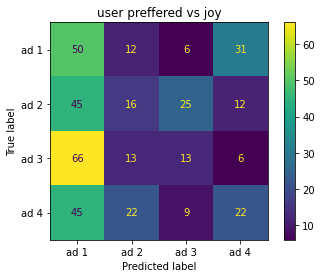

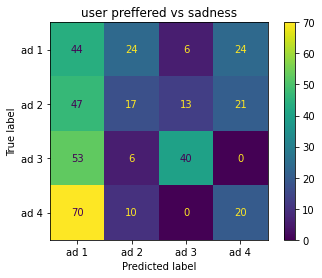

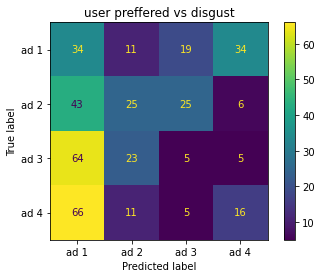

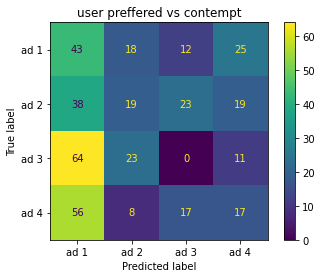

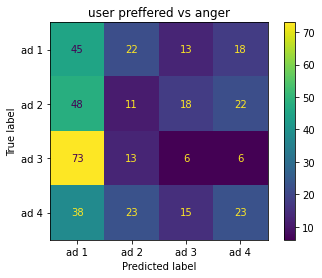

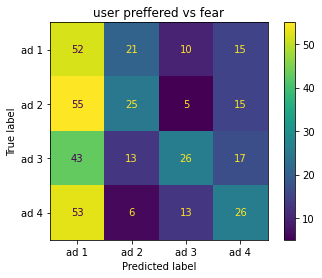

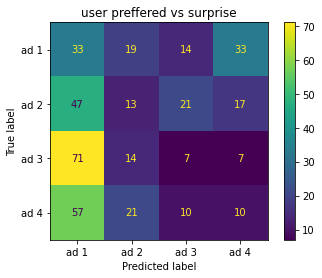

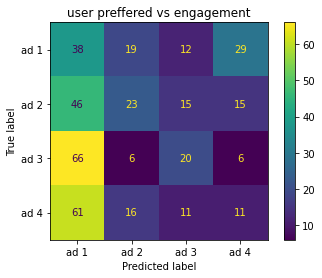

<Figure size 432x288 with 0 Axes>

In [21]:
# fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,10))
for emoName in ['joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear', 'surprise', 'engagement']: #, 'attention']:
# for emoName in ['joy']:
    labels = ['ad 1', 'ad 2', 'ad 3', 'ad 4']
    cm = confusion_matrix(favAd['ad_with_' + emoName].values -1, favAd['ad'].values, [0,1,2,3])
    d = cm/cm.sum(axis=1)[:, np.newaxis] * 100
    cm = d.astype(int)
    ax= plt.subplot()
#     ax= axes.flatten()
#     axes.flatten()
    ax.set_xlabel('User Preffered');
    ax.set_ylabel('Predicted'); 
    ax.set_title('user preffered vs ' + emoName); 
    # ax.legend()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    print(emoName)
#     disp.ax_.set_title(emoName)
    plt.figure()
    disp.plot(ax=ax)
#     print('\n')
# plt.tight_layout()  

In [106]:
for facialEx in ['smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch']:
    favAd['ad_with_' + facialEx] = 0


In [22]:
# for facialEx in ['smile', 'innerBrowRaise', 'browRaise',
#        'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
#        'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
#        'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
#        'eyeWiden', 'cheekRaise', 'lipStretch']:
#     for name in usernames:
#         rows = moviePartsWithAge.loc[moviePartsWithAge['userId'] == name]
# #         print(rows[['joy', 'sadness', 'disgust', 'contempt', 'anger', 'fear', 'surprise', 'valence', 'engagement', 'attention', 'age', 'userId', 'num', 'part']])
#         rows = moviePartsWithAge.loc[(moviePartsWithAge['userId'] == name) & (rows['part'] == 'A')]
# #         break;
# #     break
#     #     rows = rows.loc[rows['part'] == 'A']
#     #     print(rows['attention'])
#     #     print(rows['joy'])
#     #     print(rows['engagement'])
# #         print(rows[['joy', 'surprise', 'valence', 'engagement', 'attention', 'age']])
#         print(rows.loc[rows[facialEx] == max(rows[facialEx])][['smile', 'innerBrowRaise', 'browRaise',
#        'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
#        'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
#        'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
#        'eyeWiden', 'cheekRaise', 'lipStretch', 'age', 'num']])
# #         break
# #     break
#         rows = rows.loc[rows[facialEx] == max(rows[facialEx])][['joy', 'surprise', 'valence', 'engagement', 'attention', 'age', 'num']]
#         print(rows['num'].values[0])
#         favAd.loc[favAd['userId'] == name, 'ad_with_' + facialEx] = rows['num'].values[0]
# #         break
# #     break



smile
innerBrowRaise
browRaise
browFurrow
noseWrinkle
upperLipRaise
lipCornerDepressor
chinRaise
lipPucker
lipPress
lipSuck
mouthOpen
smirk
eyeClosure
attention
lidTighten
jawDrop
dimpler
eyeWiden
cheekRaise
lipStretch


<ipython-input-112-8b918b159967>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


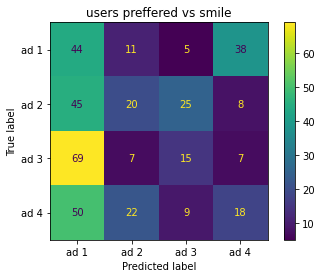

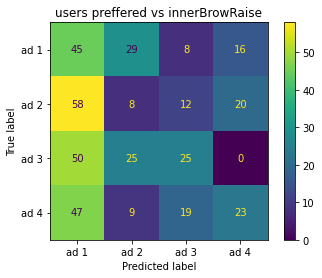

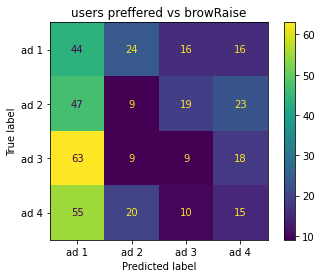

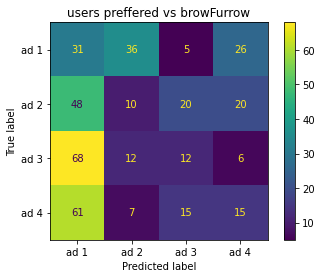

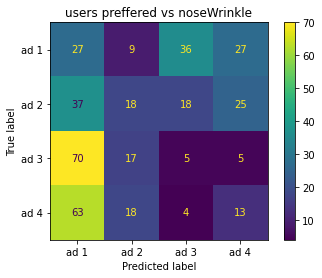

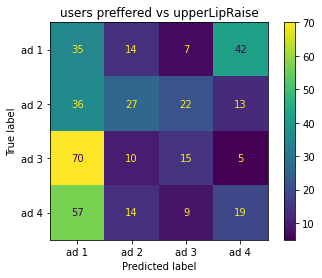

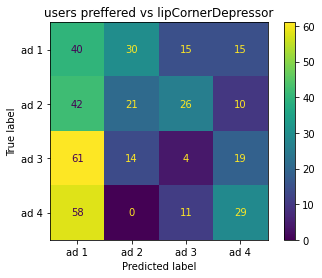

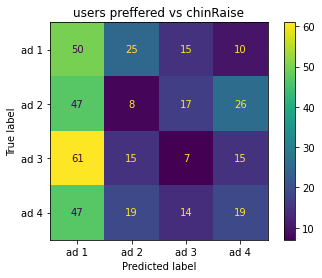

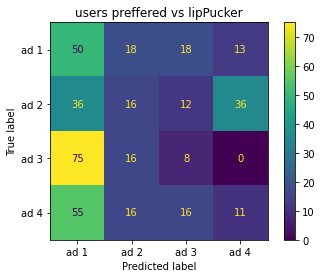

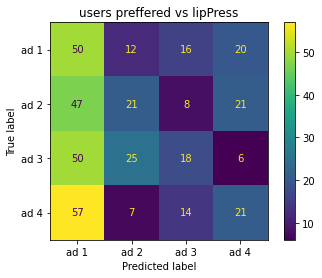

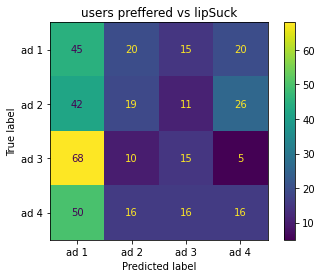

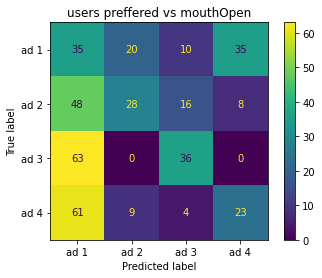

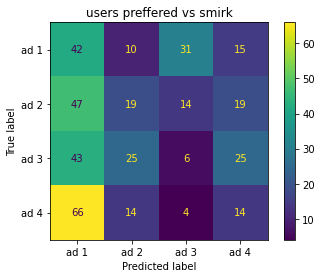

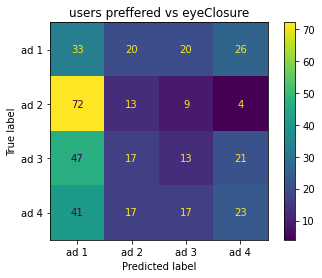

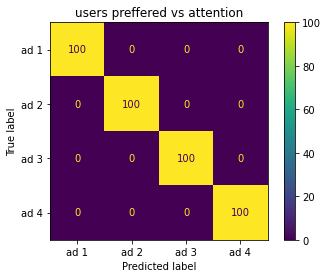

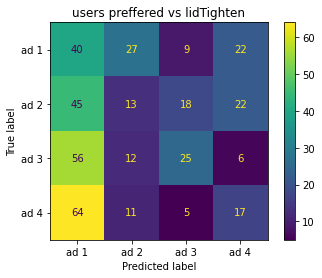

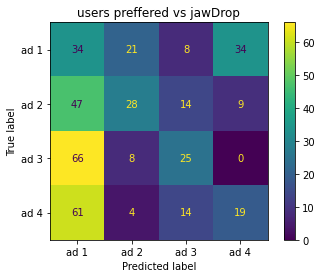

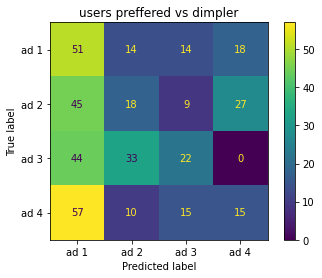

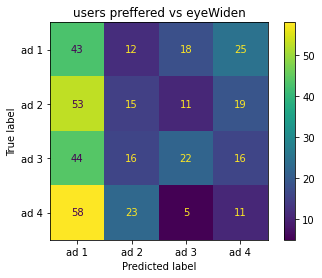

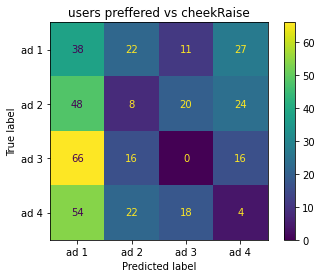

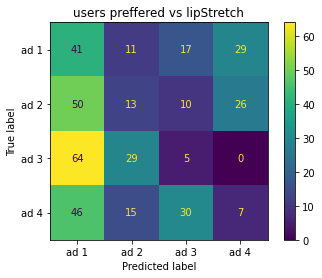

<Figure size 432x288 with 0 Axes>

In [112]:
# fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,10))
for facialEx in ['smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch']:
# for emoName in ['joy']:
    labels = ['ad 1', 'ad 2', 'ad 3', 'ad 4']
    cm = confusion_matrix(favAd['ad_with_' + facialEx].values -1, favAd['ad'].values, [0,1,2,3])
    d = cm/cm.sum(axis=1)[:, np.newaxis] * 100
    cm = d.astype(int)
    ax= plt.subplot()
#     ax= axes.flatten()
#     axes.flatten()
    ax.set_xlabel('User preffered');
    ax.set_ylabel('predicted'); 
    ax.set_title('users preffered vs ' + facialEx); 
    # ax.legend()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    print(facialEx)
#     disp.ax_.set_title(emoName)
    plt.figure()
    disp.plot(ax=ax)
#     print('\n')

In [119]:
def plotEmoForWholeDS(i, isParallel, emotion):
    age3 = moviePartsWithAge.loc[moviePartsWithAge['age'] > -1]
    userIds = set(list(age3['userId']))
    allData = []
    for user in userIds:
        data = moviePartsWithAge.loc[moviePartsWithAge['userId'] == user]
#         print(len(data))
        if len(data) > 7:
            joy = []
            movie = []
#             print(len(data))
        #     fig, ax = plt.subplots()
            for i, row in data.iterrows():
                joy.append(row[emotion])
                movie.append(str(row['num']) + '_' + row['part'])
        #         plt.plot(movie, joy)
            dictionary = {
                movie[0]: joy[0],
                movie[1]: joy[1],
                movie[2]: joy[2],
                movie[3]: joy[3],
                movie[4]: joy[4],
                movie[5]: joy[5],
                movie[6]: joy[6],
                movie[7]: joy[7],
                'userId': user
            }
        #     print(dictionary)
            allData.append(dictionary)
#         movie.append('userId')
#     print(allData)
#     break
    parallel = pd.DataFrame(allData, columns=movieColumns)
#     print(parallel)
#     break
    if isParallel :
        plt.figure(figsize=(10, 6), dpi=80)
        parallel_coordinates(parallel, "userId");
    else:
#         parallel.mean().plot(kind='line')
        return allData

In [23]:
# a0 = plotEmoForWholeDS(0, False, 'attention')
# a1 = plotEmoForWholeDS(0, False, 'joy')
# a2 = plotEmoForWholeDS(0, False, 'sadness')
# a3 = plotEmoForWholeDS(0, False, 'anger')
# a4 = plotEmoForWholeDS(0, False, 'engagement')
# # a1 = plotEmo(1, False, 'attention')
# # a2 = plotEmo(2, False, 'attention')
# # a3 = plotEmo(3, False, 'attention')

# p0 = pd.DataFrame(a0, columns=movieColumns)
# p1 = pd.DataFrame(a1, columns=movieColumns)
# p2 = pd.DataFrame(a2, columns=movieColumns)
# p3 = pd.DataFrame(a3, columns=movieColumns)
# p4 = pd.DataFrame(a4, columns=movieColumns)

# fig = plt.figure()
# plt.legend(['blue => attention', 'orange => joy', 'red => sadness', 'green => anger', 'black => engagement']);
# # plt.show()
# p0.mean().plot(kind='line', color='blue')
# p1.mean().plot(kind='line', color='orange')
# p2.mean().plot(kind='line', color='red')
# p3.mean().plot(kind='line', color='green')
# p4.mean().plot(kind='line', color='black')



<AxesSubplot:xlabel='Movie / Ad part', ylabel='Engagement value'>

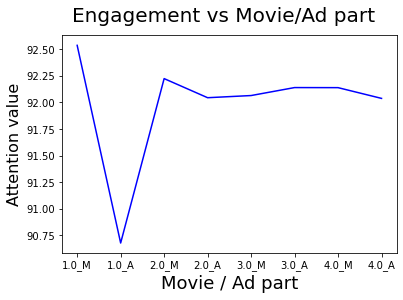

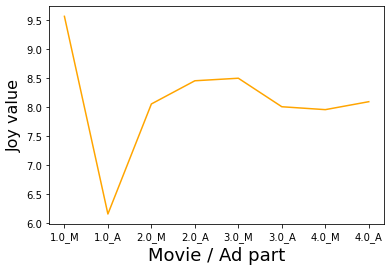

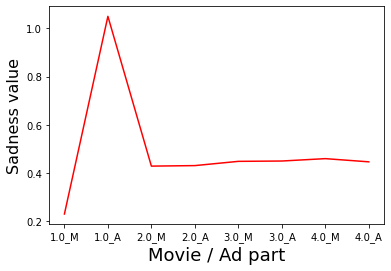

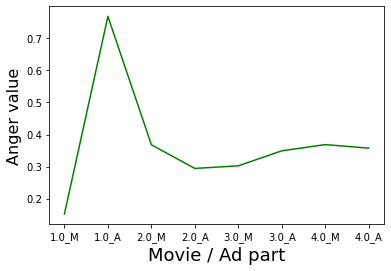

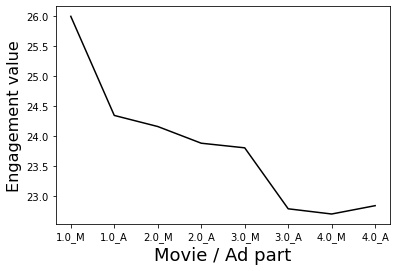

In [131]:
fig = plt.figure()
# plt.axes(('value', 'joy', 50, 50), facecolor='w')
fig.suptitle('Attention vs Movie/Ad part', fontsize=20)
plt.xlabel('Movie / Ad part', fontsize=18)
plt.ylabel('Attention value', fontsize=16)
p0.mean().plot(kind='line', color='blue')

plt.figure()
fig.suptitle('Joy vs Movie/Ad part', fontsize=20)
plt.xlabel('Movie / Ad part', fontsize=18)
plt.ylabel('Joy value', fontsize=16)
p1.mean().plot(kind='line', color='orange')

plt.figure()
fig.suptitle('Sadness vs Movie/Ad part', fontsize=20)
plt.xlabel('Movie / Ad part', fontsize=18)
plt.ylabel('Sadness value', fontsize=16)
p2.mean().plot(kind='line', color='red')

plt.figure()
fig.suptitle('Anger vs Movie/Ad part', fontsize=20)
plt.xlabel('Movie / Ad part', fontsize=18)
plt.ylabel('Anger value', fontsize=16)
p3.mean().plot(kind='line', color='green')

plt.figure()
fig.suptitle('Engagement vs Movie/Ad part', fontsize=20)
plt.xlabel('Movie / Ad part', fontsize=18)
plt.ylabel('Engagement value', fontsize=16)
p4.mean().plot(kind='line', color='black')

In [ ]:
['smile', 'innerBrowRaise', 'browRaise',
       'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor',
       'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk',
       'eyeClosure', 'attention', 'lidTighten', 'jawDrop', 'dimpler',
       'eyeWiden', 'cheekRaise', 'lipStretch', 'age', 'num']

In [138]:
a0 = plotEmoForWholeDS(0, False, 'smile')
a1 = plotEmoForWholeDS(0, False, 'browRaise')
a2 = plotEmoForWholeDS(0, False, 'noseWrinkle')
a3 = plotEmoForWholeDS(0, False, 'upperLipRaise')
a4 = plotEmoForWholeDS(0, False, 'lipCornerDepressor')
a5 = plotEmoForWholeDS(0, False, 'chinRaise')
a6 = plotEmoForWholeDS(0, False, 'lipPucker')
a7 = plotEmoForWholeDS(0, False, 'lipPress')
a8 = plotEmoForWholeDS(0, False, 'eyeClosure')
a9 = plotEmoForWholeDS(0, False, 'dimpler')
# a1 = plotEmo(1, False, 'attention')
# a2 = plotEmo(2, False, 'attention')
# a3 = plotEmo(3, False, 'attention')

p0 = pd.DataFrame(a0, columns=movieColumns)
p1 = pd.DataFrame(a1, columns=movieColumns)
p2 = pd.DataFrame(a2, columns=movieColumns)
p3 = pd.DataFrame(a3, columns=movieColumns)
p4 = pd.DataFrame(a4, columns=movieColumns)
p5 = pd.DataFrame(a5, columns=movieColumns)
p6 = pd.DataFrame(a6, columns=movieColumns)
p7 = pd.DataFrame(a7, columns=movieColumns)
p8 = pd.DataFrame(a8, columns=movieColumns)
p9 = pd.DataFrame(a9, columns=movieColumns)





<AxesSubplot:>

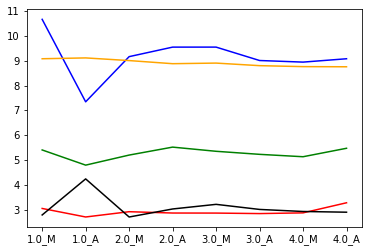

In [139]:
p0.mean().plot(kind='line', color='blue')
p1.mean().plot(kind='line', color='orange')
p2.mean().plot(kind='line', color='red')
p3.mean().plot(kind='line', color='green')
p4.mean().plot(kind='line', color='black')


<AxesSubplot:>

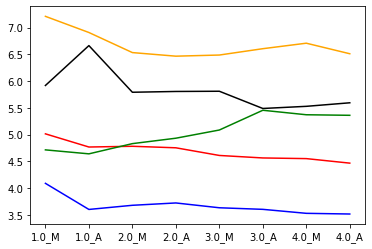

In [140]:
p5.mean().plot(kind='line', color='blue')
p6.mean().plot(kind='line', color='orange')
p7.mean().plot(kind='line', color='red')
p8.mean().plot(kind='line', color='green')
p9.mean().plot(kind='line', color='black')

In [19]:
# favAd = pd.read_csv('favAd.csv')
favAd = pd.read_csv('../recommendation/favAd_with_all_emotions.csv')

In [20]:
# favAd = favAd.drop(['Unnamed: 0'], axis=1)
favAd.head()

,userId,ad,age,gender,ad_with_joy,ad_with_sadness,ad_with_disgust,ad_with_contempt,ad_with_anger,ad_with_fear,ad_with_surprice,ad_with_engagement,ad_with_surprise
0,vihan_22_male,0.0,1,1,1.0,1.0,4.0,3.0,3.0,2.0,0,1.0,2.0
1,Rashmika_23_male,0.0,1,1,3.0,3.0,3.0,4.0,3.0,1.0,0,1.0,1.0
2,dylon_20_male,0.0,1,1,2.0,1.0,2.0,4.0,3.0,2.0,0,1.0,2.0
3,geethanjali_41_female,1.0,2,0,2.0,1.0,2.0,1.0,2.0,1.0,0,2.0,2.0
4,Sajith_28_male,0.0,1,1,3.0,2.0,4.0,3.0,2.0,3.0,0,3.0,3.0


In [17]:
# building classifiers and ml dl models
from sklearn.ensemble import RandomForestClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, SpatialDropout3D,LeakyReLU
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import 
import plotly.express as px

In [16]:
%load_ext tensorboard

In [17]:
favAd = pd.read_csv('../recommendation/favAd.csv')

In [92]:
x = favAd.drop(['userId', 'ad'], axis=1)
x = np.asarray(x.values, dtype=int)
y = np.asarray(favAd['ad'].values, dtype=int)

In [93]:
favAd.head()

,userId,ad,age,gender
0,vihan_22_male,0.0,1,1
1,Rashmika_23_male,0.0,1,1
2,dylon_20_male,0.0,1,1
3,geethanjali_41_female,1.0,2,0
4,Sajith_28_male,0.0,1,1


In [32]:
df = favAd.drop(['userId'], axis=1)

In [35]:
df = df.reindex(['gender', 'age', 'ad'], axis=1)

In [94]:
moviePartsWithAge['ad'] = -1

In [95]:
for i, row in moviePartsWithAge.iterrows():
    
    userId = row['userId']
#     print(userId)
    ad = int(favAd.loc[favAd['userId'] == userId]['ad'].values[0])
    moviePartsWithAge.loc[moviePartsWithAge['userId'] == userId, 'ad'] = ad
    
#     break

In [117]:
emoMoviePartsAgeAd = moviePartsWithAge[['smile', 'innerBrowRaise', 'browRaise', 'browFurrow',
       'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor', 'chinRaise',
       'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure','lidTighten', 'jawDrop', 'dimpler', 'eyeWiden',
       'cheekRaise', 'lipStretch', 'ad']]
x = emoMoviePartsAgeAd.drop(['ad'], axis=1)
x = np.asarray(x.values, dtype=int)
y = np.asarray(emoMoviePartsAgeAd['ad'].values, dtype=int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)
# x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=50)
print(x_train.shape)
print(x_test.shape)


(495, 20)
(124, 20)


In [101]:

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))


[[65  0  0  0]
 [23  0  0  0]
 [12  0  6  0]
 [18  0  0  0]]
Accuracy0.5725806451612904
              precision    recall  f1-score   support

     class 0       0.55      1.00      0.71        65
     class 1       0.00      0.00      0.00        23
     class 2       1.00      0.33      0.50        18
     class 3       0.00      0.00      0.00        18

    accuracy                           0.57       124
   macro avg       0.39      0.33      0.30       124
weighted avg       0.43      0.57      0.44       124



/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
clf = svm.SVC()
clf.fit(x_train, y_train)
svmPredict = clf.predict(x_test)
cm = confusion_matrix(y_test, svmPredict)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, svmPredict)))
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

[[64  0  0  1]
 [ 5 18  0  0]
 [ 5  0 13  0]
 [ 8  0  0 10]]
Accuracy0.8467741935483871
              precision    recall  f1-score   support

     class 0       0.55      1.00      0.71        65
     class 1       0.00      0.00      0.00        23
     class 2       1.00      0.33      0.50        18
     class 3       0.00      0.00      0.00        18

    accuracy                           0.57       124
   macro avg       0.39      0.33      0.30       124
weighted avg       0.43      0.57      0.44       124



/home/hicup/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
emoMoviePartsAgeAd = moviePartsWithAge[['smile', 'innerBrowRaise', 'browRaise', 'browFurrow',
       'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor', 'chinRaise',
       'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure','lidTighten', 'jawDrop', 'dimpler', 'eyeWiden',
       'cheekRaise', 'lipStretch', 'ad']]
x = emoMoviePartsAgeAd.drop(['ad'], axis=1)
x = np.asarray(x.values, dtype=int)
y = np.asarray(emoMoviePartsAgeAd['ad'].values, dtype=int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=50)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=50)

y_test = to_categorical(y_test).astype(np.int32)
y_train = to_categorical(y_train).astype(np.int32)
y_val = to_categorical(y_val).astype(np.int32)

In [137]:
def create_model():
    model = Sequential()
    model.add(Dense(100, input_dim=20))
    model.add(LeakyReLU())
    model.add(Dense(50))
    model.add(LeakyReLU())
    model.add(Dense(25))
    model.add(LeakyReLU())
    model.add(Dense(10))
    model.add(LeakyReLU())
    model.add(Dense(4, activation='softmax'))
    # Compile model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [138]:
model = create_model()
visualizer = tf.keras.callbacks.TensorBoard(log_dir='./timestamps_facial_features/')
earlystops = tf.keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True, verbose=1)


# Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

# Fit data to model
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_val, y_val),
            callbacks=[visualizer, earlystops])

Epoch 1/500
10/10 [==============================] - 0s 22ms/step - loss: 1.5593 - accuracy: 0.2161 - val_loss: 1.4785 - val_accuracy: 0.2097
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 1.2908 - accuracy: 0.2363 - val_loss: 1.2295 - val_accuracy: 0.2097
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 1.1148 - accuracy: 0.2735 - val_loss: 1.0309 - val_accuracy: 0.2581
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 1.0509 - accuracy: 0.2220 - val_loss: 0.8815 - val_accuracy: 0.2419
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 0.8490 - accuracy: 0.3073 - val_loss: 0.7817 - val_accuracy: 0.3065
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.8332 - accuracy: 0.2913 - val_loss: 0.7155 - val_accuracy: 0.3226
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 0.7383 - accuracy: 0.3252 - val_loss: 0.6727 - val_accuracy: 0.3468
Epoch 8/500


Epoch 59/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4004 - accuracy: 0.6610 - val_loss: 0.3977 - val_accuracy: 0.6774
Epoch 60/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3915 - accuracy: 0.6774 - val_loss: 0.3963 - val_accuracy: 0.6855
Epoch 61/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3730 - accuracy: 0.6933 - val_loss: 0.3945 - val_accuracy: 0.6855
Epoch 62/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3920 - accuracy: 0.6565 - val_loss: 0.3929 - val_accuracy: 0.6855
Epoch 63/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4008 - accuracy: 0.6738 - val_loss: 0.3907 - val_accuracy: 0.6855
Epoch 64/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3942 - accuracy: 0.6749 - val_loss: 0.3895 - val_accuracy: 0.6855
Epoch 65/500
10/10 [==============================] - 0s 6ms/step - loss: 0.3897 - accuracy: 0.6802 - val_loss: 0.3881 - val_accuracy: 0.6855
Epoch 

10/10 [==============================] - 0s 6ms/step - loss: 0.1962 - accuracy: 0.9068 - val_loss: 0.2581 - val_accuracy: 0.8387
Epoch 174/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2088 - accuracy: 0.9017 - val_loss: 0.2583 - val_accuracy: 0.8468
Epoch 175/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2073 - accuracy: 0.8929 - val_loss: 0.2581 - val_accuracy: 0.8468
Epoch 176/500
10/10 [==============================] - 0s 6ms/step - loss: 0.2016 - accuracy: 0.8902 - val_loss: 0.2561 - val_accuracy: 0.8306
Epoch 177/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1971 - accuracy: 0.9112 - val_loss: 0.2564 - val_accuracy: 0.8306
Epoch 178/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1979 - accuracy: 0.9085 - val_loss: 0.2565 - val_accuracy: 0.8387
Epoch 179/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1999 - accuracy: 0.8960 - val_loss: 0.2549 - val_accuracy: 0.8387
Epoch 180/500

10/10 [==============================] - 0s 6ms/step - loss: 0.0881 - accuracy: 0.9735 - val_loss: 0.2304 - val_accuracy: 0.8548
Epoch 288/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0921 - accuracy: 0.9756 - val_loss: 0.2381 - val_accuracy: 0.8629
Epoch 289/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0910 - accuracy: 0.9714 - val_loss: 0.2319 - val_accuracy: 0.8548
Epoch 290/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0932 - accuracy: 0.9728 - val_loss: 0.2317 - val_accuracy: 0.8629
Epoch 291/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1031 - accuracy: 0.9684 - val_loss: 0.2337 - val_accuracy: 0.8629
Epoch 292/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0860 - accuracy: 0.9824 - val_loss: 0.2352 - val_accuracy: 0.8629
Epoch 293/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0835 - accuracy: 0.9768 - val_loss: 0.2354 - val_accuracy: 0.8629
Epoch 294/500

In [139]:
# y_test.argmax(1)
predict = model.predict(x_test)
y_pred = np.argmax(predict, axis=1)
y_test_maxed = np.argmax(y_test, axis=1)
print(classification_report(y_test_maxed, y_pred, target_names=['class 0', 'class 1', 'class 2', 'class 3']))


              precision    recall  f1-score   support

     class 0       0.92      0.90      0.91        96
     class 1       0.81      0.83      0.82        30
     class 2       0.79      0.90      0.84        29
     class 3       0.83      0.77      0.80        31

    accuracy                           0.87       186
   macro avg       0.84      0.85      0.84       186
weighted avg       0.87      0.87      0.87       186



In [18]:
model = tf.keras.models.load_model('../recommendation/models/facial_features.h5')

In [141]:

auc = 100*roc_auc_score(y_test, predict, average='weighted')
acc = 100*accuracy_score(np.argmax(y_test, axis=1), np.argmax(predict, axis=1))
prec, rec, f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), average='weighted')
print('Test accuracy: {:.5f}, AUC {:.5f}, Precision {:.5f}, Recall {:.5f}, F1 {:.5f}, \n'.format( acc, auc, prec, rec, f1))


Test accuracy: 86.55914, AUC 94.99042, Precision 0.86813, Recall 0.86559, F1 0.86601, 



In [29]:


# labels = ['class 0', 'class 1', 'class 2', 'class 3']
# cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), [0,1,2,3])
# ax= plt.subplot()
# ax.set_xlabel('Predicted labels');
# ax.set_ylabel('True labels'); 
# ax.set_title('Confusion matrix of the emotion based classifier'); 
# # ax.legend()
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# disp.plot(ax=ax)


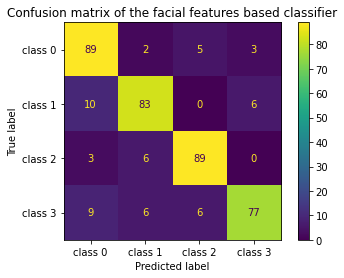

In [143]:
model = tf.keras.models.load_model('../recommendation/models/facial_features.h5')


labels = ['class 0', 'class 1', 'class 2', 'class 3']
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predict, axis=1), [0,1,2,3])
d = cm/cm.sum(axis=1)[:, np.newaxis] * 100
cm = d.astype(int)
ax= plt.subplot()
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix of the facial features based classifier'); 
# ax.legend()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(ax=ax)

In [25]:
%load_ext tensorboard

In [28]:
# %tensorboard --logdir ../recommendation/timestamps_facial_features/ --host localhost

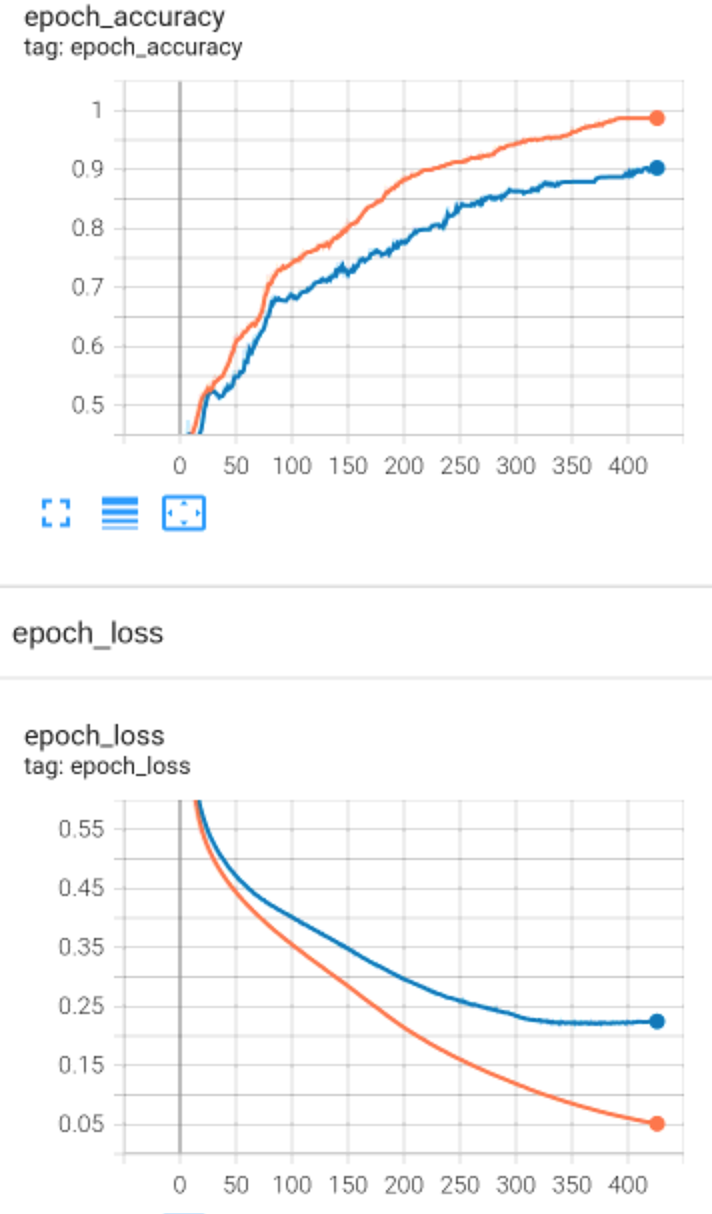

In [113]:
Image(filename='../recommendation/trainingLogs/facial_features.png')


In [140]:
model.save('../recommendation/models/facial_features.h5')
